IMPORTING LIBRARIES

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET

In [12]:
df=pd.read_csv("D:/tsa_107/data/Microsoft_Stock.csv")

HANDLING DATA

In [13]:

print(df.describe())

              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08


In [14]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


DATA VISUALIZATION

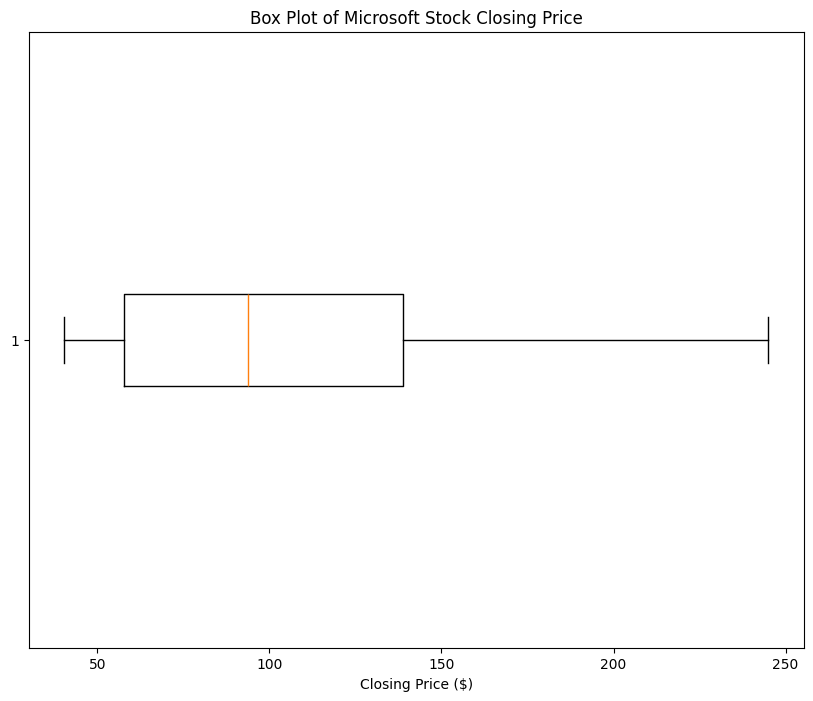

In [15]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['Close'], vert=False)
plt.title('Box Plot of Microsoft Stock Closing Price')
plt.xlabel('Closing Price ($)')
plt.show()



NULL VALUES

In [16]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


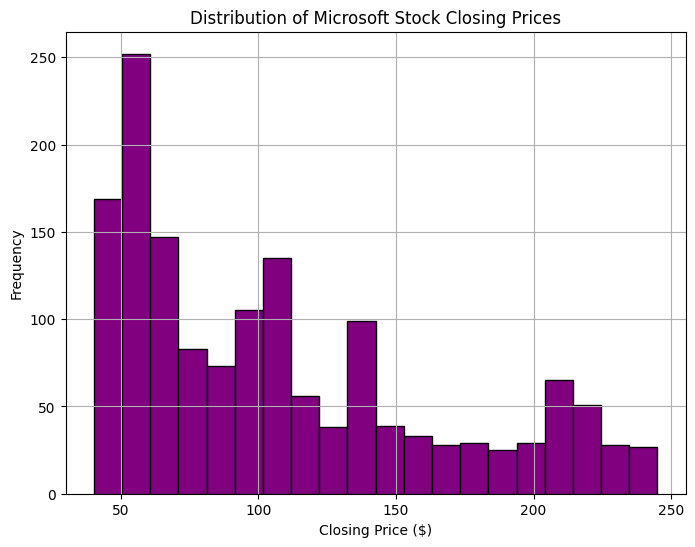

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Microsoft Stock Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

correlation map

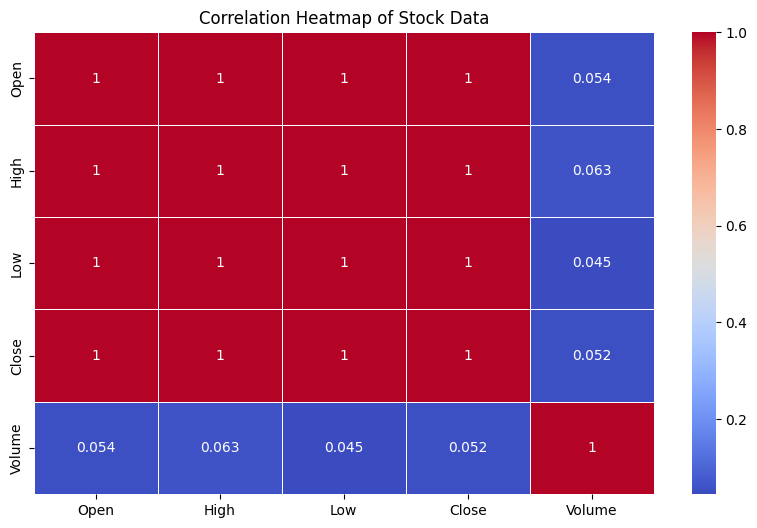

In [25]:
df_numeric = df.select_dtypes(include=[np.number])  
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Data')
plt.show()


Stock Trend

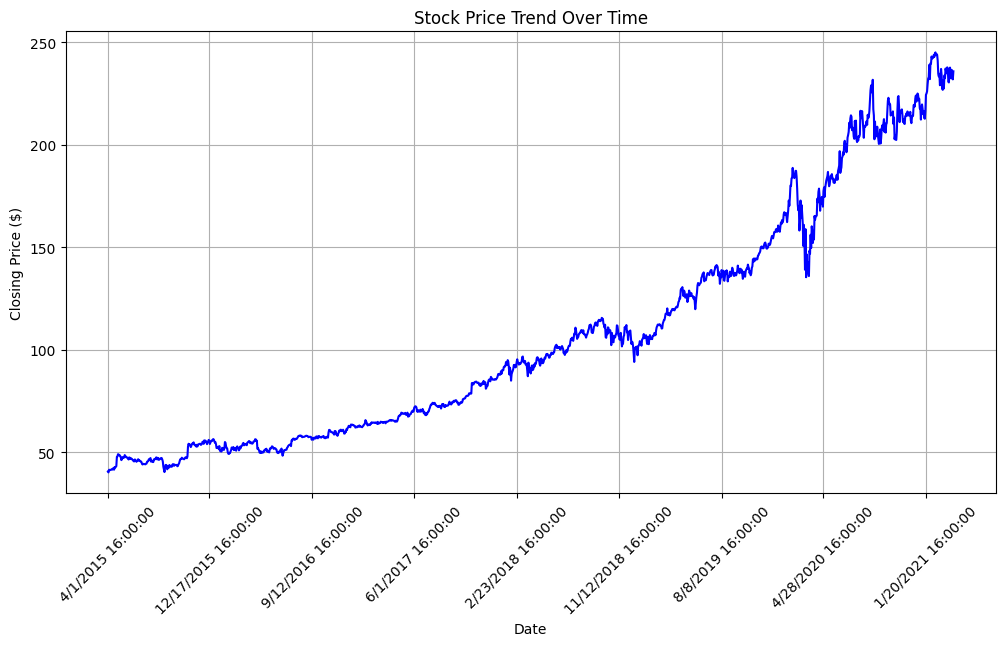

In [22]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')


plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  

plt.grid(True)
plt.show()


Network Graph

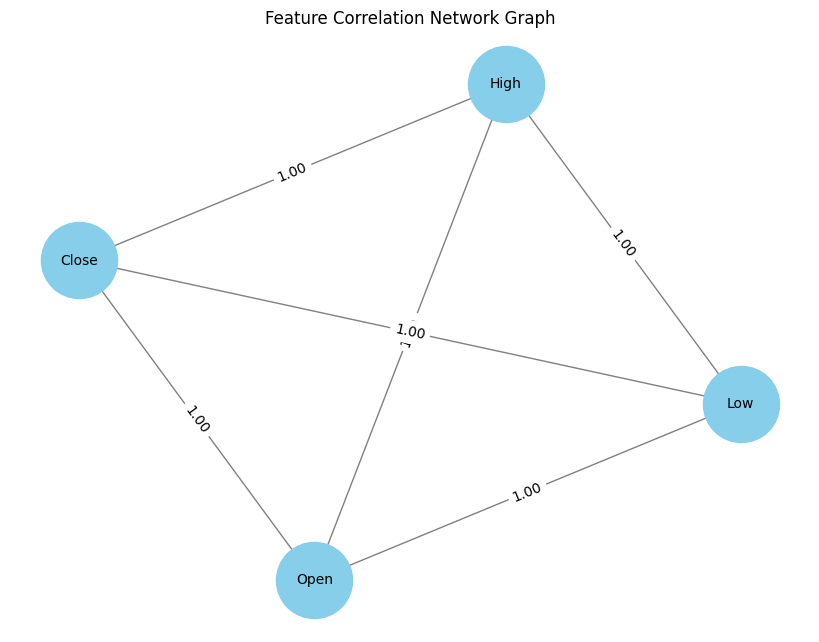

In [21]:
import networkx as nx


df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()


G = nx.Graph()


threshold = 0.5  
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=10)


edge_labels = {(i, j): f"{corr_matrix.loc[i, j]:.2f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Feature Correlation Network Graph")
plt.show()
